## Week 1

In [ ]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data download
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ArrowHead/ArrowHead_TRAIN.txt'
X_TRAIN = []
Y_TRAIN = []
with open(file_path, 'r') as file:
    for line in file:
        line = list(map(float, line.split()))
        X_TRAIN.append(np.array(line[1:]))
        Y_TRAIN.append(int(line[0]))

file_path = '/content/drive/MyDrive/ArrowHead/ArrowHead_TEST.txt'
X_TEST = []
Y_TEST = []
with open(file_path, 'r') as file:
    for line in file:
        line = list(map(float, line.split()))
        X_TEST.append(np.array(line[1:]))
        Y_TEST.append(int(line[0]))

X_TRAIN = np.array(X_TRAIN)
Y_TRAIN = np.array(Y_TRAIN)
X_TEST = np.array(X_TEST)
Y_TEST = np.array(Y_TEST)

Mounted at /content/drive


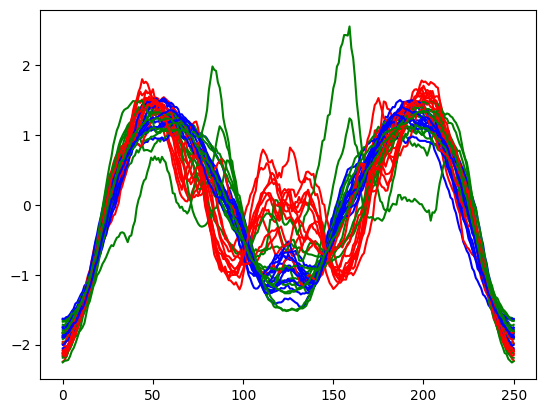

In [ ]:
# Training data plotting
color_map = {0:"red", 1:"blue", 2:"green"}

for i in range(len(X_TRAIN)):
  plt.plot(range(251), X_TRAIN[i], color=color_map[Y_TRAIN[i]])

plt.show()

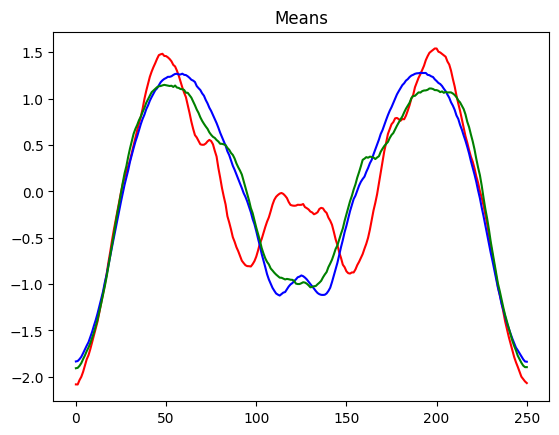

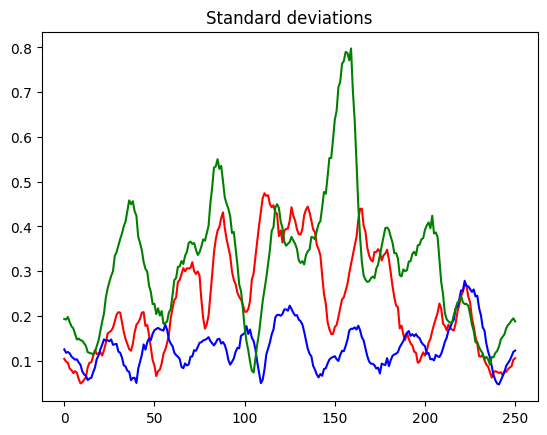

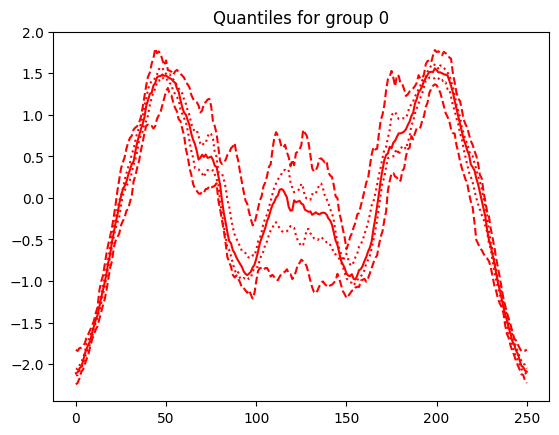

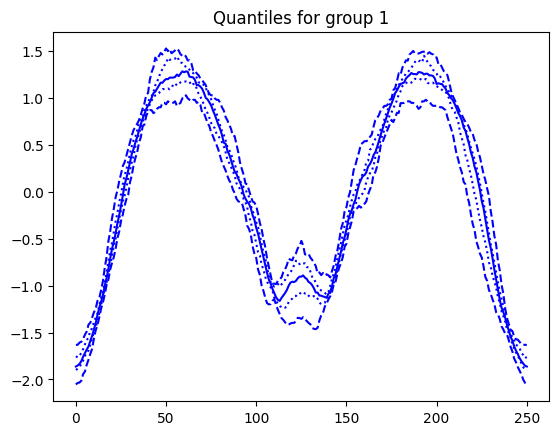

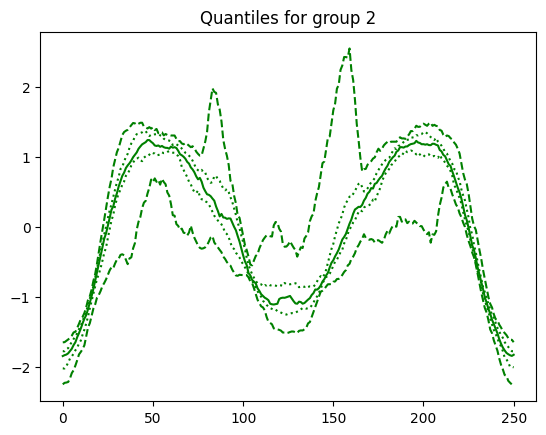

In [ ]:
# Basic statitic analysis across each of 3 groups
X_TRAIN_0 = X_TRAIN[Y_TRAIN == 0]
X_TRAIN_1 = X_TRAIN[Y_TRAIN == 1]
X_TRAIN_2 = X_TRAIN[Y_TRAIN == 2]

means = []
stds = []
quantiles = []

means.append(np.mean(X_TRAIN_0, axis=0))
stds.append(np.std(X_TRAIN_0, axis=0))
quantiles.append(np.quantile(X_TRAIN_0, [0, 0.25, 0.5, 0.75, 1], axis=0))

means.append(np.mean(X_TRAIN_1, axis=0))
stds.append(np.std(X_TRAIN_1, axis=0))
quantiles.append(np.quantile(X_TRAIN_1, [0, 0.25, 0.5, 0.75, 1], axis=0))

means.append(np.mean(X_TRAIN_2, axis=0))
stds.append(np.std(X_TRAIN_2, axis=0))
quantiles.append(np.quantile(X_TRAIN_2, [0, 0.25, 0.5, 0.75, 1], axis=0))

for i in range(3):
  plt.plot(range(251), means[i], color=color_map[i])

plt.title("Means")
plt.show()

for i in range(3):
  plt.plot(range(251), stds[i], color=color_map[i])

plt.title("Standard deviations")
plt.show()

for i in range(3):
  plt.plot(range(251), quantiles[i][0], color=color_map[i], linestyle="--")
  plt.plot(range(251), quantiles[i][4], color=color_map[i], linestyle="--")
  plt.plot(range(251), quantiles[i][1], color=color_map[i], linestyle=":")
  plt.plot(range(251), quantiles[i][3], color=color_map[i], linestyle=":")
  plt.plot(range(251), quantiles[i][2], color=color_map[i])
  plt.title(f"Quantiles for group {i}")
  plt.show()



In [ ]:
# KNN on the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFIER.fit(X_TRAIN, Y_TRAIN)

print(f"Training set accuracy: {KNN_CLASSIFIER.score(X_TRAIN, Y_TRAIN)}")
print(f"Test set accuracy: {KNN_CLASSIFIER.score(X_TEST, Y_TEST)}")

# Confussion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KNN_CLASSIFIER.predict(X_TEST))
print(CONFUSION_MATRIX)

Training set accuracy: 0.9166666666666666
Test set accuracy: 0.7942857142857143
[[46 10 13]
 [ 4 48  1]
 [ 1  7 45]]


In [ ]:
# K-means on the data
from sklearn.cluster import KMeans

KMEANS_CLASSIFIER = KMeans(n_clusters=3, random_state=0)
KMEANS_CLASSIFIER.fit(X_TRAIN)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KMEANS_CLASSIFIER.predict(X_TEST))
print(CONFUSION_MATRIX)

[[25 43  1]
 [51  2  0]
 [50  1  2]]


In [ ]:
X_TRAIN_FEATURES = [[] for i in range(len(X_TRAIN))]
X_TEST_FEATURES = [[] for i in range(len(X_TEST))]

for i in range(len(X_TRAIN)):
  for j in range(0, X_TRAIN.shape[1] - 1, 10):
    if j != 240:
      X_TRAIN_FEATURES[i].append(np.mean(X_TRAIN[i][j:j+10]))
      X_TRAIN_FEATURES[i].append(np.std(X_TRAIN[i][j:j+10]))
    else:
      X_TRAIN_FEATURES[i].append(np.mean(X_TRAIN[i][j:]))
      X_TRAIN_FEATURES[i].append(np.std(X_TRAIN[i][j:]))

for i in range(len(X_TEST)):
  for j in range(0, X_TEST.shape[1] - 1, 10):
    if j != 240:
      X_TEST_FEATURES[i].append(np.mean(X_TEST[i][j:j+10]))
      X_TEST_FEATURES[i].append(np.std(X_TEST[i][j:j+10]))
    else:
      X_TEST_FEATURES[i].append(np.mean(X_TEST[i][j:]))
      X_TEST_FEATURES[i].append(np.std(X_TEST[i][j:]))

X_TRAIN_FEATURES = np.array(X_TRAIN_FEATURES)
X_TEST_FEATURES = np.array(X_TEST_FEATURES)

In [ ]:
# KNN on the features
KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFIER.fit(X_TRAIN_FEATURES, Y_TRAIN)

print(f"Training set accuracy: {KNN_CLASSIFIER.score(X_TRAIN_FEATURES, Y_TRAIN)}")
print(f"Test set accuracy: {KNN_CLASSIFIER.score(X_TEST_FEATURES, Y_TEST)}")

# Confussion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KNN_CLASSIFIER.predict(X_TEST_FEATURES))
print(CONFUSION_MATRIX)

Training set accuracy: 0.9166666666666666
Test set accuracy: 0.8114285714285714
[[51  9  9]
 [ 4 48  1]
 [ 1  9 43]]


Better results than KNN on the data.

In [ ]:
# K-means on the features
KMEANS_CLASSIFIER = KMeans(n_clusters=3, random_state=0)
KMEANS_CLASSIFIER.fit(X_TRAIN_FEATURES)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KMEANS_CLASSIFIER.predict(X_TEST_FEATURES))
print(CONFUSION_MATRIX)

[[25 43  1]
 [51  2  0]
 [50  1  2]]


Same results as K-means on the data.

In [ ]:
X_TRAIN_FEATURES2 = [[] for i in range(len(X_TRAIN))]
X_TEST_FEATURES2 = [[] for i in range(len(X_TEST))]

for i in range(len(X_TRAIN)):
  for j in range(0, X_TRAIN.shape[1] - 11, 10):
    if j != 230:
      X_TRAIN_FEATURES2[i].append(np.mean(X_TRAIN[i][j:j+20]))
      X_TRAIN_FEATURES2[i].append(np.std(X_TRAIN[i][j:j+20]))
    else:
      X_TRAIN_FEATURES2[i].append(np.mean(X_TRAIN[i][j:]))
      X_TRAIN_FEATURES2[i].append(np.std(X_TRAIN[i][j:]))
  X_TRAIN_FEATURES2[i].append(np.mean(np.concatenate([X_TRAIN[i][:10], X_TRAIN[i][240:]])))
  X_TRAIN_FEATURES2[i].append(np.std(np.concatenate([X_TRAIN[i][:10], X_TRAIN[i][240:]])))

for i in range(len(X_TEST)):
  for j in range(0, X_TEST.shape[1] - 11, 10):
    if j != 230:
      X_TEST_FEATURES2[i].append(np.mean(X_TEST[i][j:j+20]))
      X_TEST_FEATURES2[i].append(np.std(X_TEST[i][j:j+20]))
    else:
      X_TEST_FEATURES2[i].append(np.mean(X_TEST[i][j:]))
      X_TEST_FEATURES2[i].append(np.std(X_TEST[i][j:]))
  X_TEST_FEATURES2[i].append(np.mean(np.concatenate([X_TEST[i][:10], X_TEST[i][240:]])))
  X_TEST_FEATURES2[i].append(np.std(np.concatenate([X_TEST[i][:10], X_TEST[i][240:]])))

X_TRAIN_FEATURES2 = np.array(X_TRAIN_FEATURES2)
X_TEST_FEATURES2 = np.array(X_TEST_FEATURES2)

In [ ]:
# KNN on the second features
KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFIER.fit(X_TRAIN_FEATURES2, Y_TRAIN)

print(f"Training set accuracy: {KNN_CLASSIFIER.score(X_TRAIN_FEATURES2, Y_TRAIN)}")
print(f"Test set accuracy: {KNN_CLASSIFIER.score(X_TEST_FEATURES2, Y_TEST)}")

# Confussion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KNN_CLASSIFIER.predict(X_TEST_FEATURES2))
print(CONFUSION_MATRIX)

Training set accuracy: 0.9166666666666666
Test set accuracy: 0.8
[[51 10  8]
 [ 5 47  1]
 [ 1 10 42]]


Worse results than KNN on the first set of features, but still better than KNN on the data.

In [ ]:
# K-means on the second features
KMEANS_CLASSIFIER = KMeans(n_clusters=3, random_state=0)
KMEANS_CLASSIFIER.fit(X_TRAIN_FEATURES2)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KMEANS_CLASSIFIER.predict(X_TEST_FEATURES2))
print(CONFUSION_MATRIX)

[[24 44  1]
 [52  1  0]
 [50  1  2]]


Some shifts when compared to K-means on the first set of features, but still bad.

In [ ]:
import math
X_TRAIN_FEATURES3 = [[] for i in range(len(X_TRAIN))]
X_TEST_FEATURES3 = [[] for i in range(len(X_TEST))]

for i in range(len(X_TRAIN)):
  X_TRAIN_FEATURES3[i].append(np.mean(X_TRAIN[i][110:141]))
  X_TRAIN_FEATURES3[i].append(5 * np.std(X_TRAIN[i][110:141]))
  X_TRAIN_FEATURES3[i].append(np.mean(X_TRAIN[i][150:156]))
  X_TRAIN_FEATURES3[i].append(5 * np.std(X_TRAIN[i][150:156]))
  X_TRAIN_FEATURES3[i].append(np.mean(X_TRAIN[i][95:101]))
  X_TRAIN_FEATURES3[i].append(5 * np.std(X_TRAIN[i][95:101]))
  diff = 0
  for j in range(125):
    diff += abs(X_TRAIN[i][j] - X_TRAIN[i][250 - j])**2
  X_TRAIN_FEATURES3[i].append((10 * (diff)/(125)))



for i in range(len(X_TEST)):
  X_TEST_FEATURES3[i].append(np.mean(X_TEST[i][110:141]))
  X_TEST_FEATURES3[i].append(5 * np.std(X_TEST[i][110:141]))
  X_TEST_FEATURES3[i].append(np.mean(X_TEST[i][150:156]))
  X_TEST_FEATURES3[i].append(5 * np.std(X_TEST[i][150:156]))
  X_TEST_FEATURES3[i].append(np.mean(X_TEST[i][95:101]))
  X_TEST_FEATURES3[i].append(5 * np.std(X_TEST[i][95:101]))
  diff = 0
  for j in range(125):
    diff += abs(X_TEST[i][j] - X_TEST[i][250 - j])**2
  X_TEST_FEATURES3[i].append((10 * (diff)/(125)))

X_TRAIN_FEATURES3 = np.array(X_TRAIN_FEATURES3)
X_TEST_FEATURES3 = np.array(X_TEST_FEATURES3)

In [ ]:
# KNN on the third set of features
KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFIER.fit(X_TRAIN_FEATURES3, Y_TRAIN)

print(f"Training set accuracy: {KNN_CLASSIFIER.score(X_TRAIN_FEATURES3, Y_TRAIN)}")
print(f"Test set accuracy: {KNN_CLASSIFIER.score(X_TEST_FEATURES3, Y_TEST)}")

# Confussion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KNN_CLASSIFIER.predict(X_TEST_FEATURES3))
print(CONFUSION_MATRIX)

Training set accuracy: 0.8611111111111112
Test set accuracy: 0.7257142857142858
[[58  5  6]
 [10 28 15]
 [ 5  7 41]]


Worst results of all KNNs so far.

In [ ]:
# K-means on the third set of features
KMEANS_CLASSIFIER = KMeans(n_clusters=3, random_state=0)
KMEANS_CLASSIFIER.fit(X_TRAIN_FEATURES3)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KMEANS_CLASSIFIER.predict(X_TEST_FEATURES3))
print(CONFUSION_MATRIX)

[[27  7 35]
 [44  0  9]
 [51  2  0]]


Kinda better results than other K-means, but still is bad at recognising the third class.

## Week 2

First of all we want to create a template for selecting automatic features.

Idea:
- Create a huge set of predefined features on sliding windows.
- Calculate mean for each class for every feature.
- Calculate standard deviation of these means and call it "feature diversity".
- If feature diversity is higher than some constant, then include this feature in final set, if not - discard it.

In [ ]:
from scipy.stats import kurtosis

def slope(y):
    slope, _ = np.polyfit(range(len(y)), y, 1)
    return slope

def normalize_columns(train_array, test_array):
    mean = np.mean(train_array, axis=0)
    std = np.std(train_array, axis=0)
    # Avoid division by zero by replacing std = 0 with 1
    std[std == 0] = 1
    return (train_array - mean) / std, (test_array - mean) / std

def calculate_feature_diversity(array, num_of_classes):
  feature_diversity = []
  for i in range(array.shape[1]):
    means = []
    for j in range(num_of_classes):
      axis = array[Y_TRAIN == j][:, i]
      means.append(np.mean(axis))
    feature_diversity.append(np.std(means))
  return np.array(feature_diversity)

X_TRAIN_FEATURES4 = [[] for i in range(len(X_TRAIN))]
X_TEST_FEATURES4 = [[] for i in range(len(X_TEST))]

NUM_OF_CLASSES = 3

INCLUDE_MEAN = True
INCLUDE_STD = True
INCLUDE_KURTOSIS = True
INCLUDE_SLOPE = True

DIVERSITY_THRESHOLD = 0.65
WINDOW_LENGTH = 21
WINDOW_STEP = 10

for i in range(len(X_TRAIN)):
  for j in range(0, X_TRAIN.shape[1] - WINDOW_LENGTH + 1, WINDOW_STEP):
    if INCLUDE_MEAN:
      X_TRAIN_FEATURES4[i].append(np.mean(X_TRAIN[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_STD:
      X_TRAIN_FEATURES4[i].append(np.std(X_TRAIN[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_KURTOSIS:
      X_TRAIN_FEATURES4[i].append(kurtosis(X_TRAIN[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_SLOPE:
      X_TRAIN_FEATURES4[i].append(slope(X_TRAIN[i][j:j+WINDOW_LENGTH]))


for i in range(len(X_TEST)):
  for j in range(0, X_TEST.shape[1] - WINDOW_LENGTH + 1, WINDOW_STEP):
    if INCLUDE_MEAN:
      X_TEST_FEATURES4[i].append(np.mean(X_TEST[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_STD:
      X_TEST_FEATURES4[i].append(np.std(X_TEST[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_KURTOSIS:
      X_TEST_FEATURES4[i].append(kurtosis(X_TEST[i][j:j+WINDOW_LENGTH]))
    if INCLUDE_SLOPE:
      X_TEST_FEATURES4[i].append(slope(X_TEST[i][j:j+WINDOW_LENGTH]))


X_TRAIN_FEATURES4 = np.array(X_TRAIN_FEATURES4)
X_TEST_FEATURES4 = np.array(X_TEST_FEATURES4)
X_TRAIN_FEATURES4, X_TEST_FEATURES4 = normalize_columns(X_TRAIN_FEATURES4, X_TEST_FEATURES4)

diversity = calculate_feature_diversity(X_TRAIN_FEATURES4, NUM_OF_CLASSES)

print(f"Total number of features created: {X_TEST_FEATURES4.shape[1]}")

X_TRAIN_FEATURES4 = X_TRAIN_FEATURES4[:, diversity > DIVERSITY_THRESHOLD]
X_TEST_FEATURES4 = X_TEST_FEATURES4[:, diversity > DIVERSITY_THRESHOLD]

print(f"Number of selected features: {X_TEST_FEATURES4.shape[1]}")

Total number of features created: 96
Number of selected features: 15


In [ ]:
# KNN on the fourth set of features
KNN_CLASSIFIER = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFIER.fit(X_TRAIN_FEATURES4, Y_TRAIN)

print(f"Training set accuracy: {KNN_CLASSIFIER.score(X_TRAIN_FEATURES4, Y_TRAIN)}")
print(f"Test set accuracy: {KNN_CLASSIFIER.score(X_TEST_FEATURES4, Y_TEST)}")

# Confussion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KNN_CLASSIFIER.predict(X_TEST_FEATURES4))
print(CONFUSION_MATRIX)

Training set accuracy: 0.8888888888888888
Test set accuracy: 0.7771428571428571
[[57  6  6]
 [ 9 40  4]
 [ 2 12 39]]


In [ ]:
# K-means on the fourth set of features
KMEANS_CLASSIFIER = KMeans(n_clusters=3, random_state=0)
KMEANS_CLASSIFIER.fit(X_TRAIN_FEATURES4)

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(Y_TEST, KMEANS_CLASSIFIER.predict(X_TEST_FEATURES4))
print(CONFUSION_MATRIX)

[[22 47  0]
 [50  3  0]
 [50  2  1]]


Now we want to test how random forests behave on raw data and defined sets of features.

In [ ]:
# Random forest on the raw data
from sklearn.ensemble import RandomForestClassifier

RANDOM_FOREST_CLASSIFIER = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=0)
RANDOM_FOREST_CLASSIFIER.fit(X_TRAIN, Y_TRAIN)

# Printing results
print(f"Training set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TRAIN, Y_TRAIN)}")
print(f"Test set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TEST, Y_TEST)}")

Training set accuracy: 1.0
Test set accuracy: 0.6971428571428572


In [ ]:
# Random forest on the first set of features
RANDOM_FOREST_CLASSIFIER = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=0)
RANDOM_FOREST_CLASSIFIER.fit(X_TRAIN_FEATURES, Y_TRAIN)

print(f"Training set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TRAIN_FEATURES, Y_TRAIN)}")
print(f"Test set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TEST_FEATURES, Y_TEST)}")

Training set accuracy: 1.0
Test set accuracy: 0.7142857142857143


In [ ]:
# Random forest on the second set of features
RANDOM_FOREST_CLASSIFIER = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=0)
RANDOM_FOREST_CLASSIFIER.fit(X_TRAIN_FEATURES2, Y_TRAIN)

print(f"Training set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TRAIN_FEATURES2, Y_TRAIN)}")
print(f"Test set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TEST_FEATURES2, Y_TEST)}")

Training set accuracy: 1.0
Test set accuracy: 0.72


In [ ]:
# Random forest on the third set of features
RANDOM_FOREST_CLASSIFIER = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=0)
RANDOM_FOREST_CLASSIFIER.fit(X_TRAIN_FEATURES3, Y_TRAIN)

print(f"Training set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TRAIN_FEATURES3, Y_TRAIN)}")
print(f"Test set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TEST_FEATURES3, Y_TEST)}")

Training set accuracy: 1.0
Test set accuracy: 0.64


In [ ]:
# Random forest on the fourth set of features
RANDOM_FOREST_CLASSIFIER = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=0)
RANDOM_FOREST_CLASSIFIER.fit(X_TRAIN_FEATURES4, Y_TRAIN)

print(f"Training set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TRAIN_FEATURES4, Y_TRAIN)}")
print(f"Test set accuracy: {RANDOM_FOREST_CLASSIFIER.score(X_TEST_FEATURES4, Y_TEST)}")

Training set accuracy: 1.0
Test set accuracy: 0.6342857142857142


Not bad, but still worse than KNN on raw data.

Now let's see how shapelets work on this dataset.

In [ ]:
!pip install pyts

In [ ]:
# Shapelets on the raw data
from pyts.classification import LearningShapelets

SHAPELETS_CLASSIFIER = LearningShapelets(tol=0.0001, max_iter=100000)
SHAPELETS_CLASSIFIER.fit(X_TRAIN, Y_TRAIN)

LearningShapelets(max_iter=100000, tol=0.0001)

In [ ]:
# Printing results
print(f"Training set accuracy: {SHAPELETS_CLASSIFIER.score(X_TRAIN, Y_TRAIN)}")
print(f"Test set accuracy: {SHAPELETS_CLASSIFIER.score(X_TEST, Y_TEST)}")

# Confussion matrix on test set
CONFUSION_MATRIX = confusion_matrix(Y_TEST, SHAPELETS_CLASSIFIER.predict(X_TEST))
print(CONFUSION_MATRIX)

Training set accuracy: 1.0
Test set accuracy: 0.8171428571428572
[[51 10  8]
 [ 8 41  4]
 [ 0  2 51]]


0.006% better results on test set than KNN on raw data and best result so far 😎

This >hour of waiting was definitely worth it.

Number of shapelets: 153


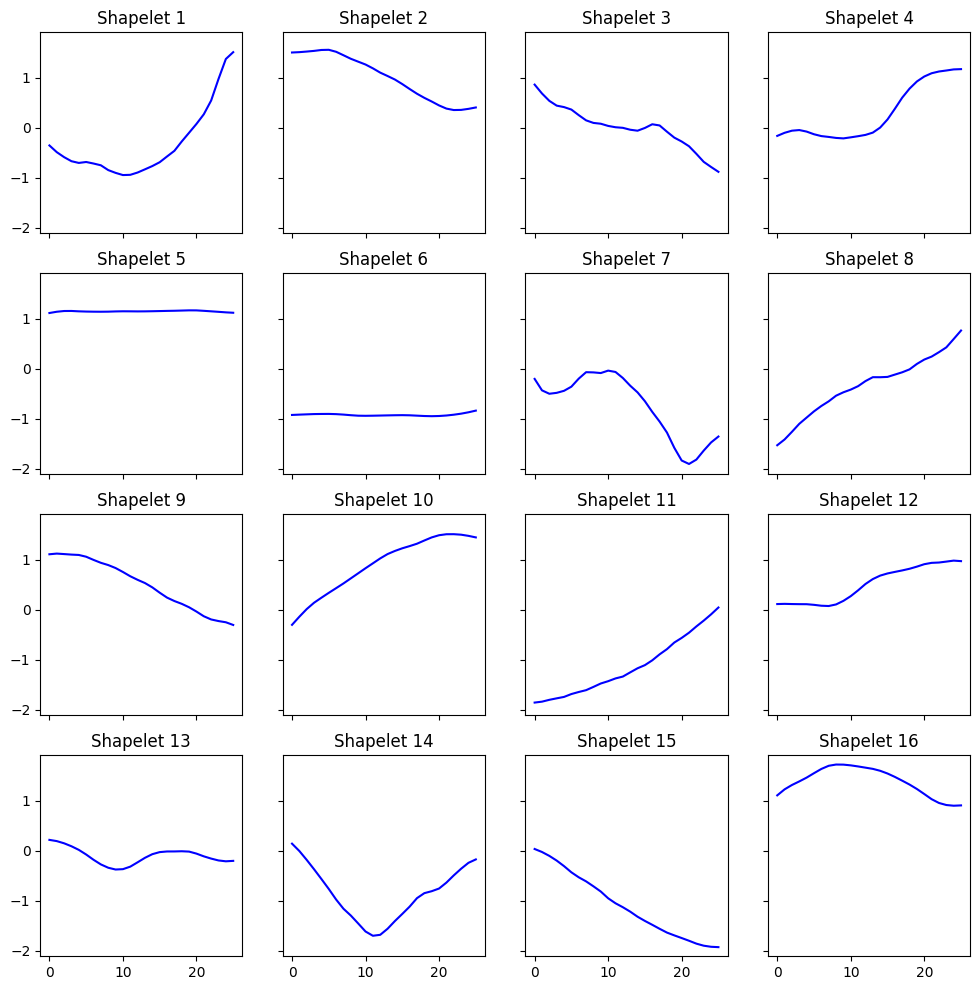

In [ ]:
print('Number of shapelets: %d' % SHAPELETS_CLASSIFIER.shapelets_.shape[1])

fig, axs = plt.subplots(4, 4, figsize=(12, 12), sharex='all', sharey='all')
for i in range(16):
    axs[i // 4, i % 4].plot(SHAPELETS_CLASSIFIER.shapelets_[0, i], 'blue')
    axs[i // 4, i % 4].set_title('Shapelet %d' % (i+1))